# Harris Corner Detection 
## Theory and Applications

![image](https://user-images.githubusercontent.com/14324911/187026929-10b1b62d-f052-41c9-8cb3-8645f257f994.png)


Corners are image locations with large intensity changes in more than one direction. Corner is special since it is the intersection of two edges. It represents a point in which the directions of these two edges change, hence, the gradient of the image (in both directions) has high variation. Although corners (generally called interest points) form only a small percentage of the image, they contain the most important features and they are invariant to translation, rotation, and illumination.

Computer vision systems use corner detection to extract these special features and use them to infer the contents of an image. This minimizes the amount of processed data in a wide range of applications. Corner detection is frequently used in image registration, video tracking, 3D reconstruction and object recognition, motion tracking, panorama stitching, building 2D mosaics, 3D reconstruction, stereo vision, image representation, object recognition, and other related computer vision areas.

In this article, we’ll dive deeply into the mathematical representation of Harris corner detection. A concrete grasp of the math behind Harris corner detection, paves the path to  understanding its algorithm, and in the next step implementing it using OpenCV, Python's open source and widely used computer vision package.

The reader of this article is assumed to have at least a passing awareness of linear algebra and tenets of image processing. In addition, a working knowledge of programming with Python is also a must.




### Basic Idea 
Harris corner detector is a widely-used algorithm, introduced by Chris Harris and Mike Stephens in 1988 as an improvement to Moravec’s corner detector. The success of the Harris detector resides in its simplicity and efficiency. The algorithm is based on measuring intensity change in gray scale images. To measure intensity changes, the algorithm considers a local window in the image and determines the average changes of image intensity (I(x,y)) that result from shifting the window by a small amount in various directions. Upon shifting the window, there are three possible cases: 


![image](https://user-images.githubusercontent.com/14324911/187062078-28c62352-84f2-459e-89e4-808c8dd6aaa4.png) 

**_Corner_**: Significant change along all directions
Corners are locations where variations of intensity function I(x,y) in both X and Y are high.
Both partial derivatives $I_x$ and $I_y$ are large. 


![image](https://user-images.githubusercontent.com/14324911/187064230-5ed69820-4366-49da-bb25-765184bef9a1.png)

**_Edge_**: No change along the edge direction
Edges are locations where variations of intensity function I(x,y) in a certain direction are high, while variation in orthogonal direction is low.
When the edge is oriented along Y, $I_x$ is large and $I_y$ is small.
When the edge is oriented along X, $I_y$ is large and $I_x$ is small.


![image](https://user-images.githubusercontent.com/14324911/187062132-6f4c58db-4ade-4b06-8940-c9c74d67b10e.png)

**_Flat Region_**: No change in all directions
Flat regions are locations where variations of I(x,y) are low in both X and Y.
Both partial derivatives $I_x$ and $I_y$ are low.

Now let’s dive into the mathematics behind Harris corner detection method.


### Mathematical Representation

Consider a grayscale two-dimensional image, I(i,j). Imagine taking an image patch, W, and shifting it by (u,v). 

![image](https://user-images.githubusercontent.com/14324911/187064476-6fda85f8-01b1-4ffc-91ce-3f444b8f9f36.png)


You can quantify the intensity change between these two patches by sum of squared difference (SSD), denoted by D(u,v).

$$D(u,v))=\sum_{i,j}{(I(i+u, j+v) - I(i,j))}^2$$

If u and v are small, by Taylor theorem, we have:

$$I(i+u, j+v) \approx I(i, j) + I_xu + I_yv$$


Where:

$$I_x = I \bigoplus gradient mask = \frac{\partial I}{\partial x}$$

and

$$I_y = I \bigoplus {gradient mask}^{T} = \frac{\partial I}{\partial y}$$

Therefore:

$$(I(i+u, j+v) - I(i,j))^2 = (I(i,j) + I_xu + I_yv - I(i,j))^2= (I_xu + I_yv)^2 =I^2_xu^2 + 2I_xI_yuy + I^2_yv^2$$

$$= \begin{bmatrix}
u & v
\end{bmatrix}\begin{bmatrix}
 I^2_x & I_xI_y\\ 
  I_xI_y &  I^2_y
\end{bmatrix}\begin{bmatrix}
u\\
v 
\end{bmatrix}$$

$$ D(u,v)= \begin{bmatrix}
u & v
\end{bmatrix}\begin{bmatrix}
\sum I^2_x & \sum I_xI_y\\ 
 \sum I_xI_y & \sum I^2_y
\end{bmatrix}\begin{bmatrix}
u\\
v 
\end{bmatrix}$$

$$H \equiv \begin{bmatrix}
 I^2_x & I_xI_y\\ 
  I_xI_y &  I^2_y
\end{bmatrix}$$

Matrix H (Harris matrix) characterizes how intensity changes in a certain direction. As mentioned earlier, a corner (interest point) is characterized by a large variation of intensity change (D(u,v)) in all directions of the vector (u,v). By analyzing the eigenvalues of H, we can express this characterization in the following way.

- If both eigenvalues are small, $ λ_1≈0 $ and $ λ_2≈0 $, then the region is likely homogeneous with intensity variations due to the presence of noise.
- If one of the eigenvalues is much larger than the other one, $ λ_2≫λ_1≈0 $ or $ λ_1≫λ_2≈0 $, then the region is likely an edge, with the largest eigenvalue corresponding to the orthogonal edge direction.
- If both eigenvalues are large, $ λ_1≫0$ and $ λ_2≫0 $, then the region is likely to contain large intensity variations in the two orthogonal directions, therefore a corner-like structure.

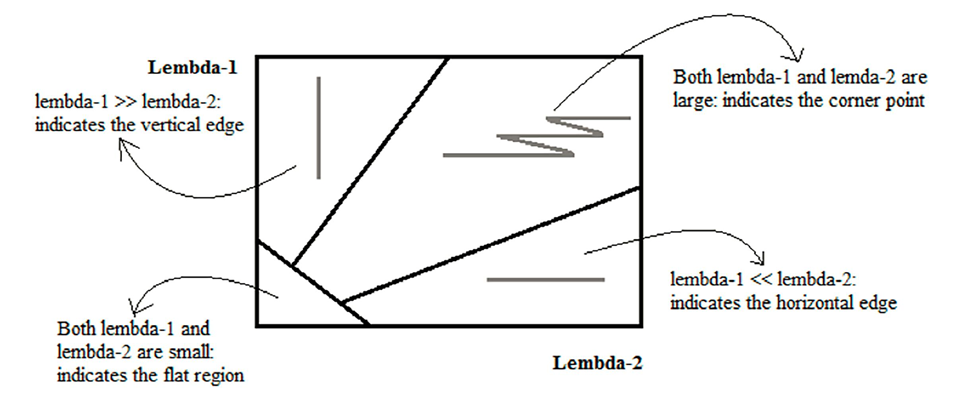

As it could be seen, eigenvalue decomposition of matrix H is a major step in Harris corner detection. This step turned out to be a major challenge to be addressed.




### Some Modifications to the Base Method

Harris and Stephens noted that exact computation of the eigenvalues is computationally expensive, since it requires the calculation of a square root. To fix this computational issue, they suggested the following alternative function, C (Harris cornerness score):

$$C = \lambda_1 \lambda_2 - k (\lambda_1  + \lambda_2)^2 =det (H)-k trace^2(H)$$

In this function, the value of k (Harris constant) has to be determined empirically, the literature reports values in the range 0.04–0.15 as feasible.
With this modification, the algorithm does not have to actually compute the eigenvalue decomposition of the matrix H. Instead, it is sufficient to evaluate the determinant and trace of matrix H to find corners.
Analyzing the C values, we will find three possible situations correspondent with the three cases considered for $\lambda_1$  and $\lambda_2$ in the previous section.

- When |C| is small, that happens when $ λ_1≈0 $ and $ λ_2≈0 $, then the region is flat.
- When C<0, that happens when $ λ_2≫λ_1≈0 $ or $ λ_1≫λ_2≈0 $, the region is an edge.
- When C is large, that happens when $ λ_1$ and $λ_2$ are large and $λ_1$  ≈ $λ_2$, the region is a corner.


An example will help to show how this works. 


### Example

Consider the following image I. W is the highlighted window in the image.
What do we have here? A corner? An edge? Or a flat area?


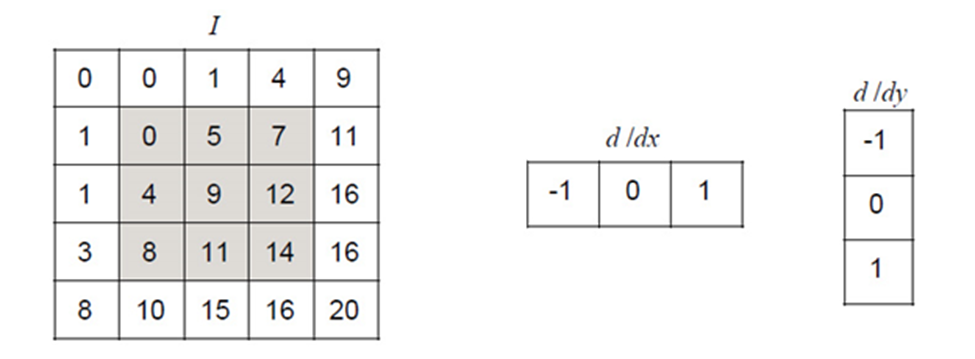


A- Compute image derivatives using the differentiation kernels given above, without normalization:

To repeat the equations;
$$I_x = \frac{\partial I}{\partial x} = I \bigoplus derivative kernel$$
and
$$I_y = \frac{\partial I}{\partial y} = I \bigoplus {derivative kernel}^{T}$$

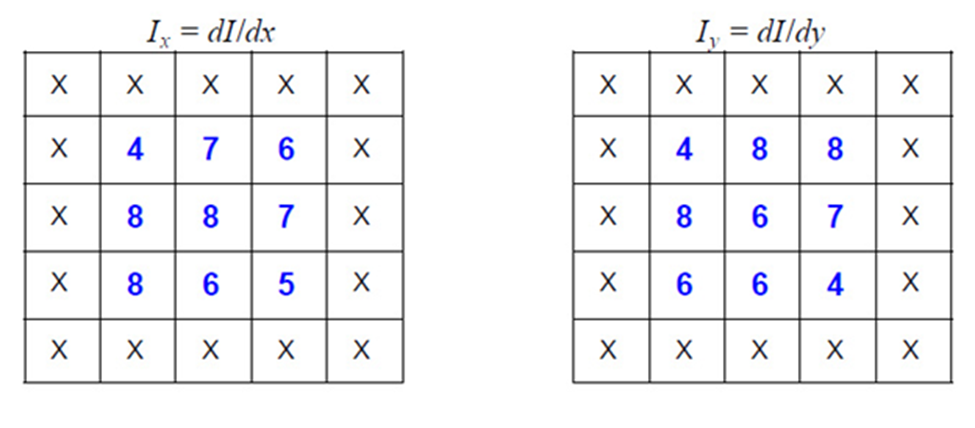

B- Compute the Harris Matrix based on the derivative matrices.

$$\sum I^2_x(i,j) = 4^2 + 7^2 + 6^2 + 8^2 + 8^2 + 7^2 + 8^2 + 6^2 + 5^2 =403$$

$$\sum I^2_y = 4^2 + 8^2 + 8^2 + 8^2 + 6^2 + 7^2 + 6^2 + 6^2 + 4^2 = 381$$

$$\sum I_xI_y = 4*4 + 7*8 + 6*8 + 8*8 + 8*6 + 7*7 + 8*6 + 6*6 + 5*4 = 385$$

$$H \equiv \begin{bmatrix}
 I^2_x & I_xI_y\\ 
  I_xI_y &  I^2_y
\end{bmatrix}$$ = $$ \begin{bmatrix}
 403 & 381\\ 
  381 &  385
\end{bmatrix}$$

C- Calculate C for k=0.04:
$$C = \lambda_1 \lambda_2 - k (\lambda_1  + \lambda_2)^2 =det (H)-k trace^2(H)$$

$$C = 5318 - 0.04*7842 = -19268.24$$

A negative Harris score indicates an edge. The graphical representation of image I, as shown below, serves as the proof to this conclusion. 

Text(0.5, 1.0, 'Example Image')

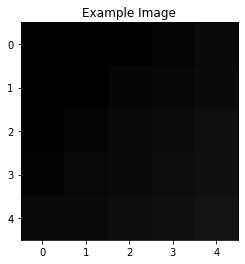

In [6]:
# Show the image discussed in the example
from matplotlib import pyplot
import numpy as np

mat = np.array([0,0,1,4,9,1,0,5,7,11,1,4,9,12,16,3,8,11,14,16,8,10,15,16,20]).reshape(5,5)
pyplot.imshow(mat, cmap='gray', vmin=0, vmax=255.)
pyplot.title('Example Image')


This example gave us the clue to writing a generic algorithm for a more systematic representation of Harris corner detector.

### Algorithm
- Input: Image I, Harris constant k, autocorrelation window size w, derivative kernel K, smoothing kernel G, threshold T for rejecting corners with small cornerness measure.
- Output: Image corners


1- Change the image to grayscale space (if necessary).

2- Apply the smoothing filter G, I=I⊕G, to remove the possible noise. Since corner detection algorithms are highly sensitive to noise, selecting the right smoothing kernel is very crucial and subjective to the context.

3- Compute the image gradient using the given derivative kernel K;
$$I_x = \frac{\partial I}{\partial x} = I \bigoplus K$$
and
$$I_y = \frac{\partial I}{\partial y} = I \bigoplus K$$

4- Form the autocorrelation matrix H over the neighborhood w of each pixel

5- Compute cornerness, C, for each pixel

6- Threshold on value of C using T

7- Apply non-maximal suppression to find local maxima

8- Return the output of non-maximal suppression step as the corners

OpenCV, Python’s computer vision library, has provided us with an optimized and easy-to use implementation of this algorithm. Let’s go to the next section.
 


### Implementing Harris Corner Detection Using OpenCV

OpenCV is an open-source software library for computer vision, machine learning, and image processing. It provides a wide range of optimised algorithms, including an extensive collection of computer vision and machine learning algorithms, both classic and state-of-the-art, to process images and videos.

With OpenCV, it is very easy to do complex tasks such as recognizing and identifying faces, identifying objects, classifying human actions in videos, tracking camera movements, tracking moving objects, extracting 3D object models, generating 3D point clouds from stereo cameras, stitching images together to generate an entire scene with a high resolution image and many more.


Opencv.cornerHarris function is based on the [Sobel](https://en.wikipedia.org/wiki/Sobel_operator) operator, for computing the gradient of the image, box filtering, calculating the Harris matrix, and computing the cornerness measure C. It does not use Gaussian convolutions, making it fast.
Opencv.cornerHarris takes in the following parameters:

	- img – Input image. It should be grayscale and float32 type.
	- blockSize – The size of neighbourhood considered for corner detection.
	- ksize – Aperture parameter of Sobel derivative used.
	- k – Harris detector free parameter in the equation.
    
Below is the python implementation:


In [11]:
# Harris Corner Detection using OpenCV

# Importing the required packages
import cv2 
import numpy as np 

# Load the image
image = cv2.imread('box.jpg') 

# Convert the image into 
# grayscale color space 
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Modify the data type 
# setting to 32-bit floating point 
operatedImage = np.float32(operatedImage) 

# apply the cv2.cornerHarris method 
# to detect the corners with appropriate 
# values as input parameters 
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 

# Results are marked through the dilated corners 
dest = cv2.dilate(dest, None) 

# Revert back to the original image, 
# with optimal threshold value 
image[dest > 0.01 * dest.max()]=[0, 0, 255] 

# Save the processed image
cv2.imwrite("boxWithCorners.jpg", image)

# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27: 
	cv2.destroyAllWindows() 



Text(0.5, 1.0, 'Example Image')

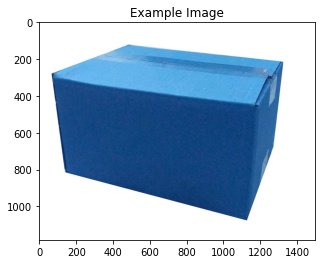

In [13]:
# Show the original and processed image inline
from matplotlib import pyplot
import cv2

box = cv2.imread('box.jpg')
cornerbox = cv2.imread('boxWithCorners.jpg') 


pyplot.imshow(box, cmap='gray', vmin=0, vmax=255)
# pyplot.imshow(cornerbox, cmap='gray', vmin=0, vmax=255)

pyplot.title('Example Image')

 
### Wrapping Up
Harris Corner Detector is a mathematical operator used to find features in a grayscale image. It is simple to implement and fast enough to work on computers. Also, it is popular because it is rotation, scale, and illumination variation independent.
The basic idea of this detector is finding if a point shows significant change in all directions. If yes, then it marks the point as a corner. To do this, it calculates the second moment matrix and corner function. If both eigenvalues of the second moment matrix are large and nearly equal, then that point is considered a corner point.
Harris corner detector is invariant to translation, rotation, and illumination change. It is most repetitive and most informative. The disadvantage of Harris corner detector is it is not invariant to large-scale change. Harris detector detects the L-junctions and points with higher curvature along with the corner points. Here we find the second moment matrix, which requires finding the gradients of an image that is sensitive to noise and computationally expensive. There are  other modifications to this standard Harris corner detector for better performance in several conditions: Harris - Laplace and Harris - Affine are scale and affine invariant versions.

### Next Steps
We learned about the Harris corner detector, its uses, its advantages and disadvantages, and how to implement a corner detector with OpenCV. Now you can expand it with your own improvements or use it to analyze your images.
To learn more about how to use the Harris corner detector in OpenCV, explore the OpenCV.org tutorial.

### References
https://en.wikipedia.org/wiki/Corner_detection

Harris, C. and Stephens, M. (1988). A combined corner and edge detector, Alvey Vision Conference, pp. 147–152.

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
